In [1]:
import os
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import Subset, DataLoader

device="cuda" if torch.cuda.is_available() else "cpu"
print(torch.__version__)
print(torchvision.__version__)
print(device)

2.7.1+cu118
0.22.1+cu118
cuda


In [2]:
base_dir = Path("Gestures/")
image_list = list(base_dir.glob("*/*.jpg"))
print(f"Total no. of images: {len(image_list)}")

Total no. of images: 4793


Random image path: Gestures\down\724.jpg
Image class: down
Image height: 256
Image width: 256


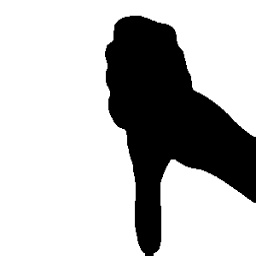

In [3]:
import random
from PIL import Image

random_img_path = random.choice(image_list)
random_img_class = random_img_path.parent.stem

img = Image.open(random_img_path)
print(f"Random image path: {random_img_path}")
print(f"Image class: {random_img_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [4]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

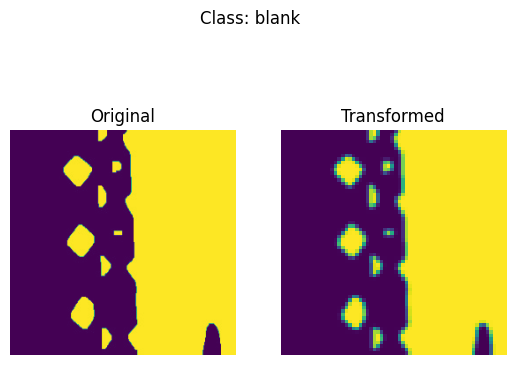

Shape of Original Image: (256, 256) | Shape of Transformed Image: torch.Size([64, 64, 1])


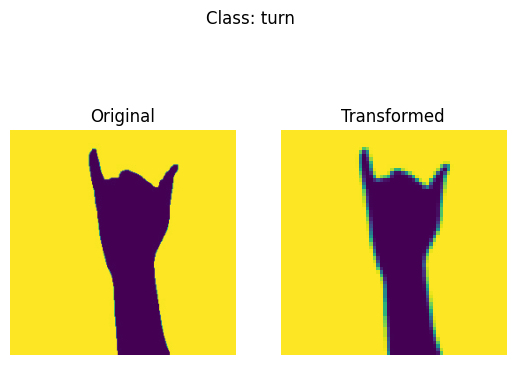

Shape of Original Image: (256, 256) | Shape of Transformed Image: torch.Size([64, 64, 1])


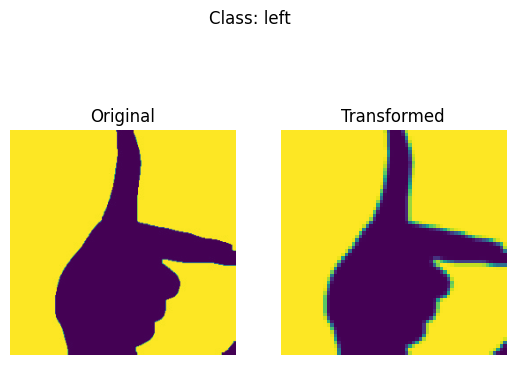

Shape of Original Image: (256, 256) | Shape of Transformed Image: torch.Size([64, 64, 1])


In [5]:
import matplotlib.pyplot as plt

for i in range(3):
    random_img_path = random.choice(image_list)
    random_img_class = random_img_path.parent.stem
    img = Image.open(random_img_path)
    
    img_arr = np.asarray(img)
    img_arr_tr = data_transform(img).permute(1,2,0)
    
    plt.subplot(1,2,1)
    plt.imshow(img_arr)
    plt.title("Original")
    plt.axis(False)
    
    plt.subplot(1,2,2)
    plt.imshow(img_arr_tr)
    plt.title("Transformed")
    plt.axis(False)
    
    plt.suptitle(f"Class: {random_img_class}")
    plt.show()
    
    print(f"Shape of Original Image: {img_arr.shape} | Shape of Transformed Image: {img_arr_tr.shape}")

In [6]:
full_dataset = datasets.ImageFolder(root=base_dir, transform=data_transform, target_transform=None)
full_dataset

Dataset ImageFolder
    Number of datapoints: 4793
    Root location: Gestures
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.13, random_state=42)

for train_idx, test_idx in splitter.split(np.zeros(len(full_dataset.targets)), full_dataset.targets):
    train_dataset = Subset(full_dataset, train_idx)
    train_dataset.classes = full_dataset.classes
    train_dataset.class_to_idx = full_dataset.class_to_idx
    test_dataset = Subset(full_dataset, test_idx)
    test_dataset.classes = full_dataset.classes
    test_dataset.class_to_idx = full_dataset.class_to_idx

In [8]:
train_dataset, test_dataset

(<torch.utils.data.dataset.Subset at 0x2c124174440>,
 <torch.utils.data.dataset.Subset at 0x2c124170410>)

In [9]:
train_dataset.dataset.transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
    transforms.ColorJitter(brightness=0.5, contrast=0.25),
    transforms.ToTensor()
])

In [10]:
img, label = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {train_dataset.classes[label]}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1647, 0.1647, 0.1647,  ..., 0.9529, 0.9529, 0.9529],
         [0.1647, 0.1647, 0.1647,  ..., 0.9529, 0.9529, 0.9529],
         [0.1647, 0.1647, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
         ...,
         [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.1647, 0.1647],
         [0.9529, 0.9529, 0.9529,  ..., 0.1647, 0.1647, 0.1647],
         [0.9529, 0.9529, 0.9529,  ..., 0.1647, 0.1647, 0.1647]],

        [[0.1647, 0.1647, 0.1647,  ..., 0.9529, 0.9529, 0.9529],
         [0.1647, 0.1647, 0.1647,  ..., 0.9529, 0.9529, 0.9529],
         [0.1647, 0.1647, 0.9529,  ..., 0.9529, 0.9529, 0.9529],
         ...,
         [0.9529, 0.9529, 0.9529,  ..., 0.9529, 0.1647, 0.1647],
         [0.9529, 0.9529, 0.9529,  ..., 0.1647, 0.1647, 0.1647],
         [0.9529, 0.9529, 0.9529,  ..., 0.1647, 0.1647, 0.1647]],

        [[0.1647, 0.1647, 0.1647,  ..., 0.9529, 0.9529, 0.9529],
         [0.1647, 0.1647, 0.1647,  ..., 0.9529, 0.9529, 0.9529],
         [0.1647, 0.1647, 0.9529,  ..., 0.95

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'turn')

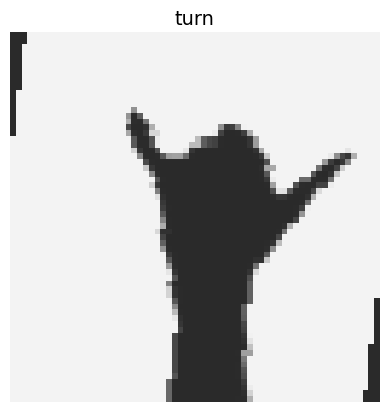

In [11]:
# Rearrange the order of dimensions
img_tr = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_tr.shape} -> [height, width, color_channels]")

# Plot the image
plt.imshow(img_tr)
plt.axis("off")
plt.title(train_dataset.classes[label], fontsize=14)

In [12]:
torch.manual_seed(42)

BATCH_SIZE = 46

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [13]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2c1241752b0>,
 <torch.utils.data.dataloader.DataLoader at 0x2c1241d3b10>)

In [14]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"label shape: {label.shape}")

Image shape: torch.Size([46, 3, 64, 64])
label shape: torch.Size([46])


In [15]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape}")
print(f"label shape: {label.shape}")

Image shape: torch.Size([46, 3, 64, 64])
label shape: torch.Size([46])


In [16]:
class GestureModel(nn.Module):
    def __init__(self, num_classes=8):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(), nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*8*8, 256), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc(x)
        return x

model = GestureModel().to(device)

In [17]:
from torchinfo import summary

summary(model, input_size=(46,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
GestureModel                             [46, 8]                   --
├─Sequential: 1-1                        [46, 128, 8, 8]           --
│    └─Conv2d: 2-1                       [46, 32, 64, 64]          896
│    └─BatchNorm2d: 2-2                  [46, 32, 64, 64]          64
│    └─ReLU: 2-3                         [46, 32, 64, 64]          --
│    └─MaxPool2d: 2-4                    [46, 32, 32, 32]          --
│    └─Conv2d: 2-5                       [46, 64, 32, 32]          18,496
│    └─BatchNorm2d: 2-6                  [46, 64, 32, 32]          128
│    └─ReLU: 2-7                         [46, 64, 32, 32]          --
│    └─MaxPool2d: 2-8                    [46, 64, 16, 16]          --
│    └─Conv2d: 2-9                       [46, 128, 16, 16]         73,856
│    └─BatchNorm2d: 2-10                 [46, 128, 16, 16]         256
│    └─ReLU: 2-11                        [46, 128, 16, 16]         --
│   

In [18]:
def train_step(model, dataloader, loss_fn, optimizer, device):
    model.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [19]:
def test_step(model, dataloader, loss_fn, device):
    model.eval()
    
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            
            y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
            test_acc += (y_pred_class == y).sum().item()/len(y_pred)

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.00001)

  0%|          | 0/60 [00:00<?, ?it/s]

Train Loss: 1.8675286337569519 | Train Accuracy: 0.31968631069080844 | Test Loss: 1.5541269864354814 | Test Accuracy: 0.6297181079789774
Train Loss: 1.3961659827075161 | Train Accuracy: 0.5916684514885413 | Test Loss: 1.1508107951709203 | Test Accuracy: 0.7295747730530341
Train Loss: 1.0629774030748305 | Train Accuracy: 0.7046229632436529 | Test Loss: 0.8886708830084119 | Test Accuracy: 0.7844003822264691
Train Loss: 0.8518803283408448 | Train Accuracy: 0.7658039112311975 | Test Loss: 0.7005730739661625 | Test Accuracy: 0.8380315336837076
Train Loss: 0.7038996858256203 | Train Accuracy: 0.8120912071436809 | Test Loss: 0.6087423499141421 | Test Accuracy: 0.8532011466794077
Train Loss: 0.6030287716414903 | Train Accuracy: 0.8378503056164224 | Test Loss: 0.49835175914423807 | Test Accuracy: 0.8827042522694696
Train Loss: 0.530087309551763 | Train Accuracy: 0.858831573224377 | Test Loss: 0.43781945747988565 | Test Accuracy: 0.907907310081223
Train Loss: 0.46487779931707696 | Train Accuracy

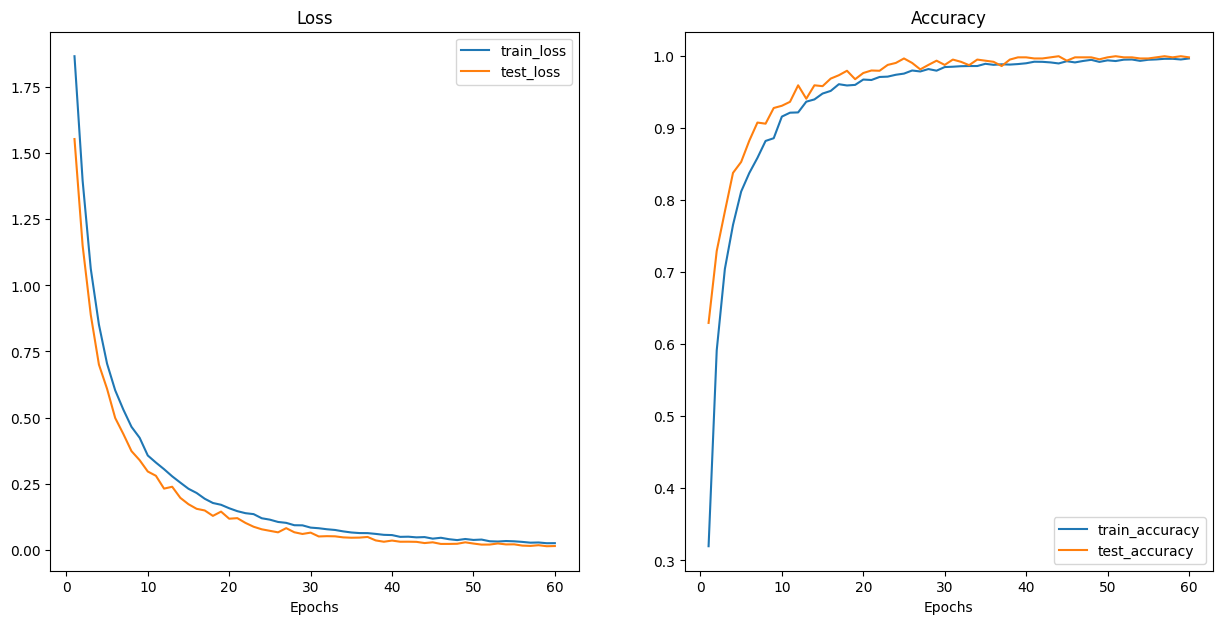

In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 60

epoch_arr = []
train_loss_arr = []
test_loss_arr = []
train_acc_arr = []
test_acc_arr = []

from tqdm.auto import tqdm

for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, device)
    
    epoch_arr.append(epoch+1)
    train_loss_arr.append(train_loss)
    train_acc_arr.append(train_acc)
    test_loss_arr.append(test_loss)
    test_acc_arr.append(test_acc)
    
    print(f"Train Loss: {train_loss} | Train Accuracy: {train_acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(epoch_arr, train_loss_arr, label='train_loss')
plt.plot(epoch_arr, test_loss_arr, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_arr, train_acc_arr, label='train_accuracy')
plt.plot(epoch_arr, test_acc_arr, label='test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [24]:
torch.save(model.state_dict(), "GestureModel.pt")


In [23]:
torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'epoch': epoch,
                'classes': full_dataset.classes
            }, 'best_gesture_model.pth')